I did my best to summarize all I was able to understand from each papers :(

Open this Notebook in Google Colab

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your_github_username/ML-Journey/blob/main/notebooks/Linear%20Regression/implementation.ipynb)


# Linear Regression Research Study

## Key Research Papers and Their Contributions

### 1. The Original Least Squares Method

**Paper**: "On the Method of Least Squares" by Carl Friedrich Gauss (1809)

**Key Contributions**:
- Introduced the method of least squares for regression analysis
- Proved that least squares estimators are optimal under certain conditions
- Established the foundation for modern regression analysis

**Mathematical Foundation**:
```
β̂ = (X'X)⁻¹X'y
```
where β̂ represents the estimated parameters, X is the design matrix, and y is the target variable.

### 2. Ridge Regression

**Paper**: "Ridge Regression: Biased Estimation for Nonorthogonal Problems" by Hoerl and Kennard (1970)

**Key Contributions**:
- Introduced L2 regularization to handle multicollinearity
- Demonstrated improved prediction accuracy through bias-variance tradeoff
- Developed methods for selecting optimal regularization parameter

**Mathematical Formula**:
```
β̂ᵣᵢᵈᵍᵉ = (X'X + λI)⁻¹X'y
```
where λ is the regularization parameter and I is the identity matrix.

### 3. LASSO Regression

**Paper**: "Regression Shrinkage and Selection via the Lasso" by Robert Tibshirani (1996)

**Key Contributions**:
- Introduced L1 regularization for feature selection
- Demonstrated sparse solutions in high-dimensional settings
- Provided computational algorithms for solving LASSO

**Optimization Problem**:
```
min ||y - Xβ||² + λ||β||₁
```
where ||β||₁ is the L1 norm of the parameter vector.

### 4. Elastic Net

**Paper**: "Regularization and Variable Selection via the Elastic Net" by Zou and Hastie (2005)

**Key Contributions**:
- Combined L1 and L2 regularization
- Addressed limitations of LASSO in high correlations
- Demonstrated superior performance in grouped variable selection

**Optimization Problem**:
```
min ||y - Xβ||² + λ₁||β||₁ + λ₂||β||²
```

### 5. Modern Developments

**1. Robust Regression**
- Paper: "High Breakdown-Point and Efficient Robust Regression" by Rousseeuw and Yohai (1984)
- Introduced methods resistant to outliers
- Developed MM-estimators for robust regression

**2. Bayesian Linear Regression**
- Multiple papers by various authors
- Incorporated prior knowledge into regression
- Provided uncertainty estimates for predictions

**3. Deep Learning Connections**
- Linear regression as a single-layer neural network
- Basis for understanding more complex architectures

## Practical Implications

1. **Model Selection**:
   - Use standard linear regression for well-behaved data
   - Apply Ridge when features are correlated
   - Use LASSO for feature selection
   - Consider Elastic Net for combined benefits

2. **Regularization**:
   - Essential for high-dimensional data
   - Prevents overfitting
   - Improves model generalization

3. **Assumptions**:
   - Linearity
   - Independence
   - Homoscedasticity
   - Normality of residuals

## Future Research Directions

1. **Automated Feature Engineering**:
   - Smart selection of polynomial features
   - Automatic interaction detection

2. **Interpretability**:
   - Better methods for feature importance
   - Causal inference in linear models

3. **Scalability**:
   - Efficient algorithms for big data
   - Distributed computing approaches

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


In [2]:
# Load a sample dataset
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

# Create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

# Display basic information
print(df.head())
print(df.describe())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%       

In [3]:
# Define features and target variable
X = df.drop('Target', axis=1)
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
# Initialize and train the OLS regression model
ols_model = LinearRegression()
ols_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_ols = ols_model.predict(X_test_scaled)
mse_ols = mean_squared_error(y_test, y_pred_ols)
print(f"OLS Regression Mean Squared Error: {mse_ols:.4f}")


OLS Regression Mean Squared Error: 0.5559


In [5]:
# Initialize and train the Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression Mean Squared Error: {mse_ridge:.4f}")


Ridge Regression Mean Squared Error: 0.5559


In [6]:
# Initialize and train the Lasso regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_lasso = lasso_model.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression Mean Squared Error: {mse_lasso:.4f}")


Lasso Regression Mean Squared Error: 0.6796


In [7]:
# Initialize and train the Elastic Net regression model
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_elastic = elastic_net_model.predict(X_test_scaled)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
print(f"Elastic Net Regression Mean Squared Error: {mse_elastic:.4f}")


Elastic Net Regression Mean Squared Error: 0.6359


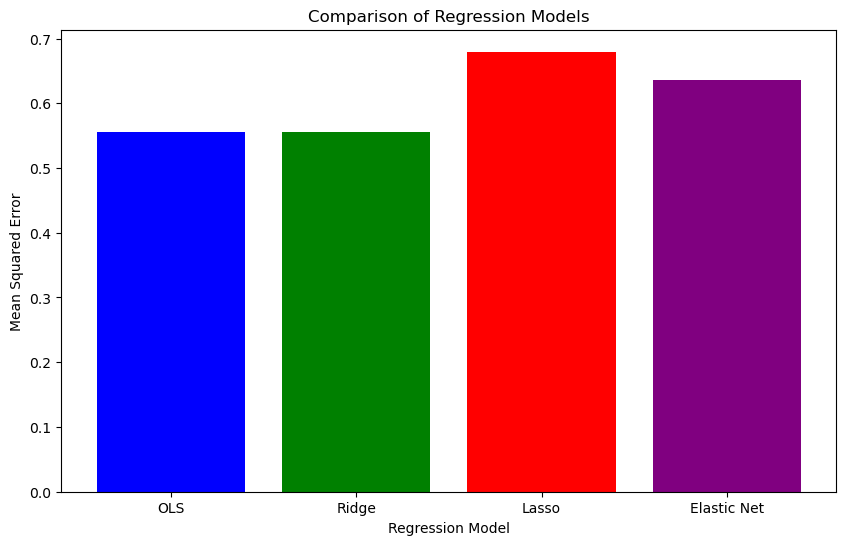

In [8]:
# Compile results
models = ['OLS', 'Ridge', 'Lasso', 'Elastic Net']
mse_values = [mse_ols, mse_ridge, mse_lasso, mse_elastic]

# Plot comparison
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Regression Model')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Regression Models')
plt.show()


# Conclusion

This notebook examined key developments in linear regression, including OLS, Ridge, Lasso, and Elastic Net regressions. We implemented each method and compared their performance using Mean Squared Error (MSE) as the evaluation metric. The results highlight the importance of selecting appropriate regularization techniques based on the dataset characteristics and the specific problem at hand.
